In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_excel('../../data/flask/aws/AWS_16Dec_2024_all_variables.xlsx')


In [4]:
aws = xr.Dataset.from_dataframe(df)
aws = aws.set_coords('TIMESTAMP (punta arenas time)')
aws = aws.rename({'TIMESTAMP (punta arenas time)':'time'})
aws = aws.swap_dims({'index':'time'})

#aws = aws.set_index('time')
aws.drop_vars('index')
aws  = aws.where(aws != '"NAN"').astype('float64')

In [11]:
aws.to_netcdf('aws_season_1.nc')

In [7]:
for var in aws.data_vars:
    plt.figure()
    aws[var].plot()
    plt.title(f'Time Series of {var}')
    plt.xlabel('Time')
    plt.ylabel(var)
    plt.grid(True)
    plt.savefig(f'aws_plots/{var}_timeseries.png')
    plt.close()

/var/folders/kl/3mt9f4qs1559xwy3mr60s7980000gp/T/ipykernel_22329/2838074245.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


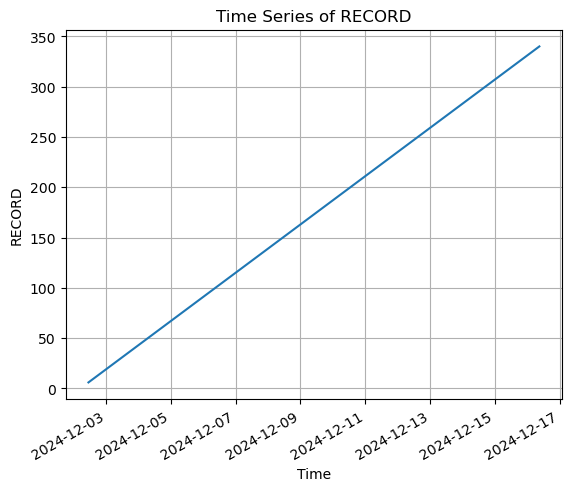

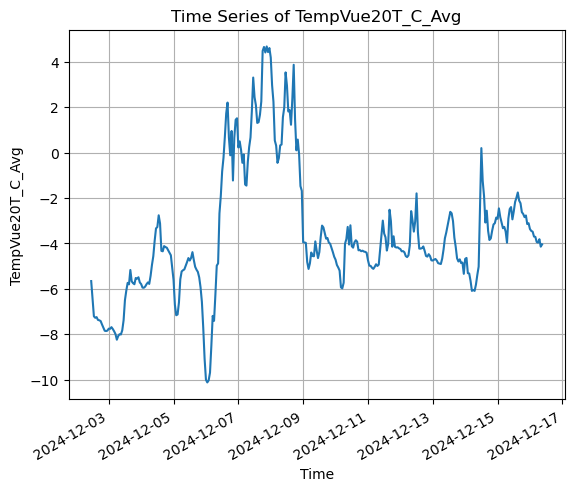

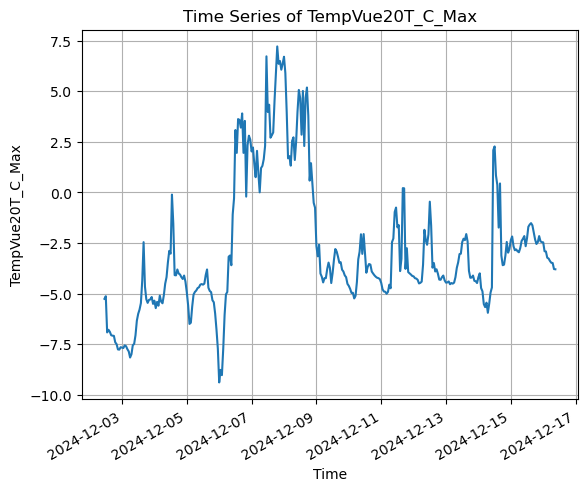

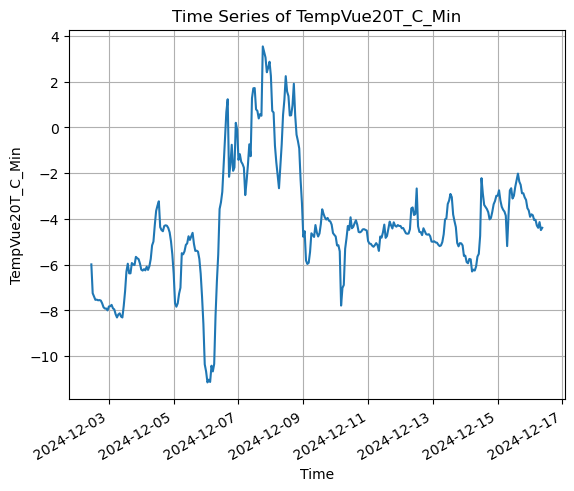

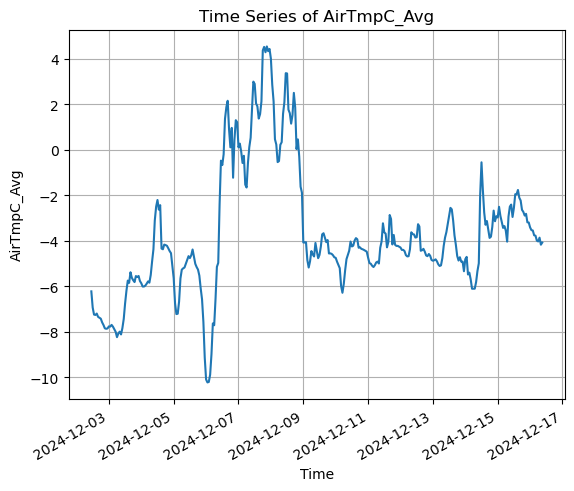

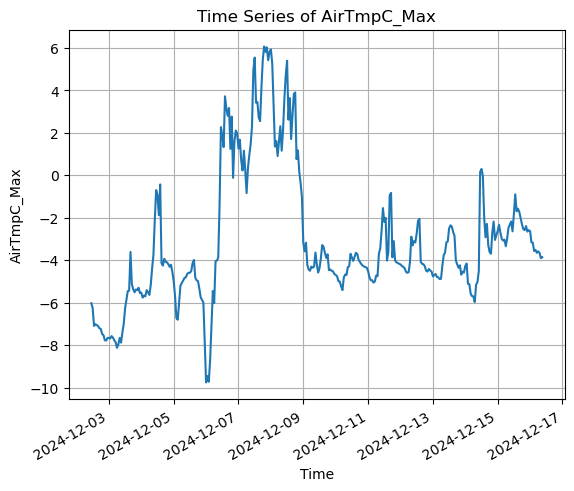

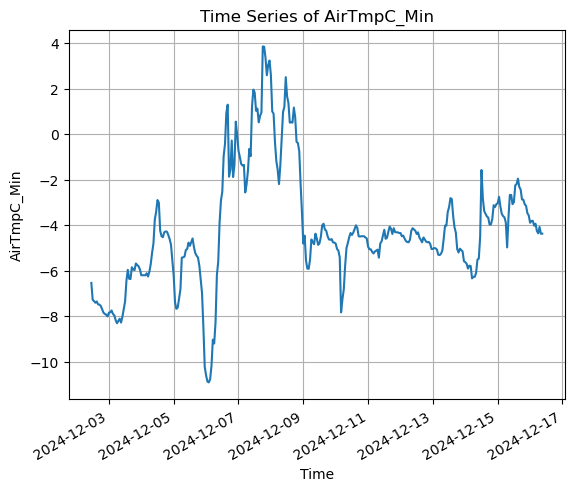

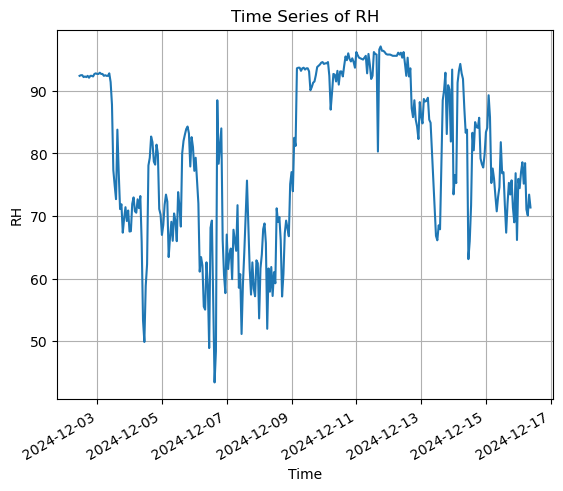

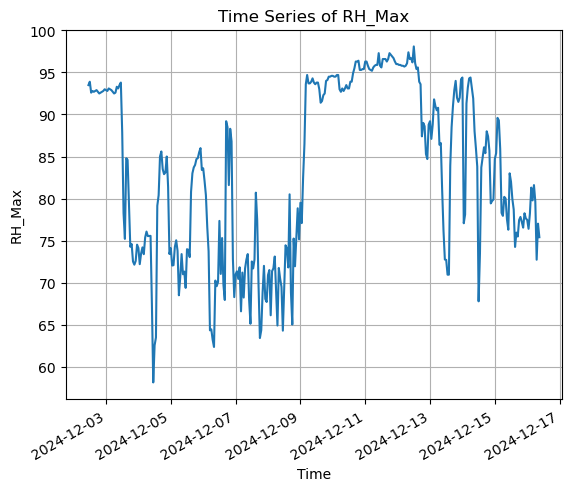

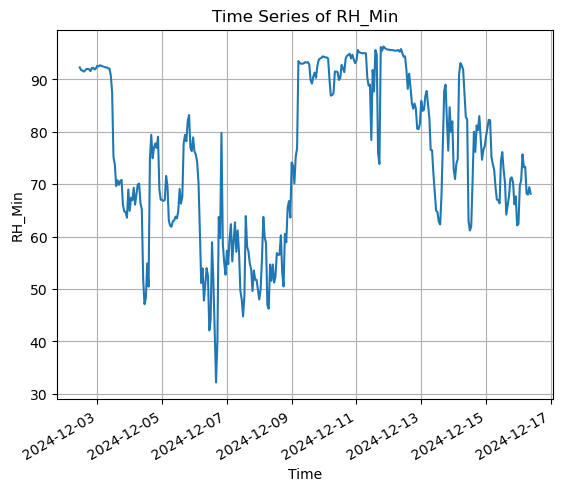

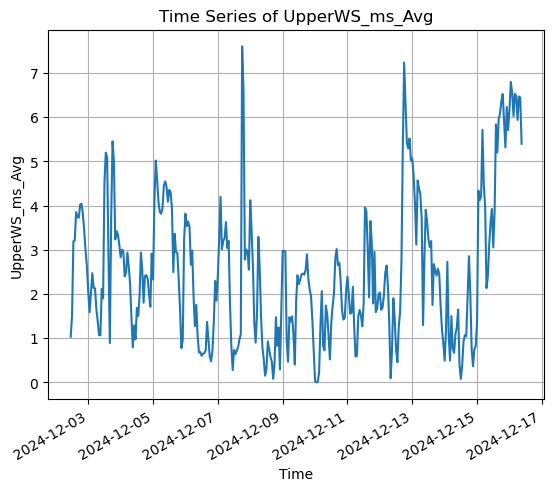

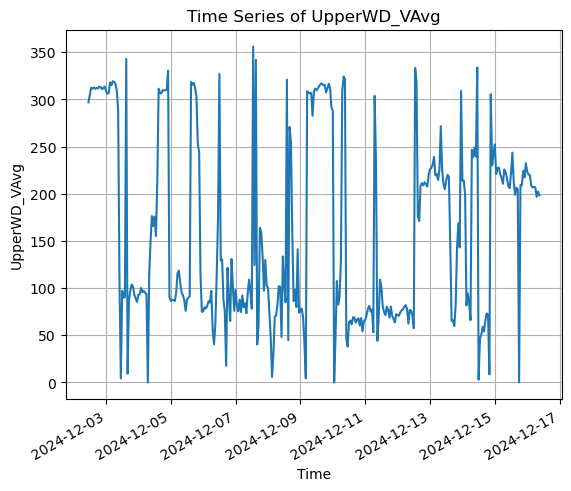

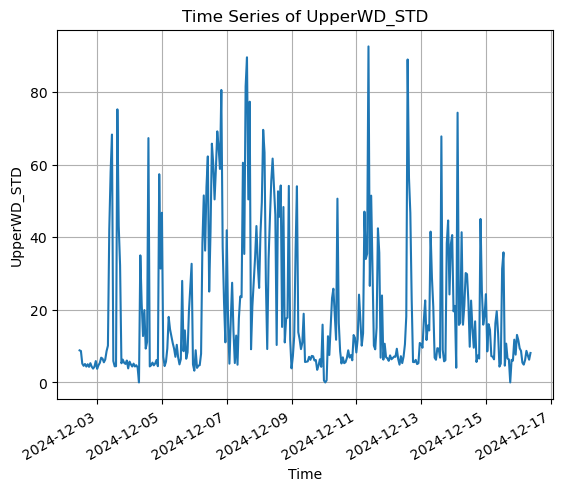

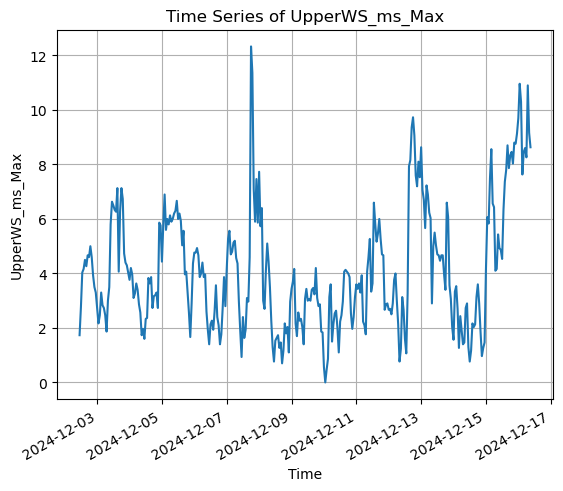

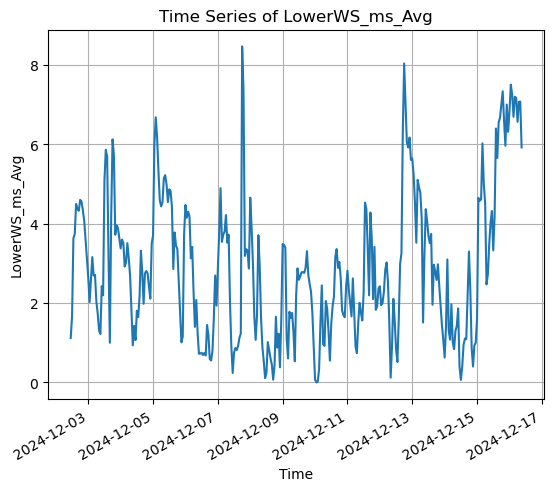

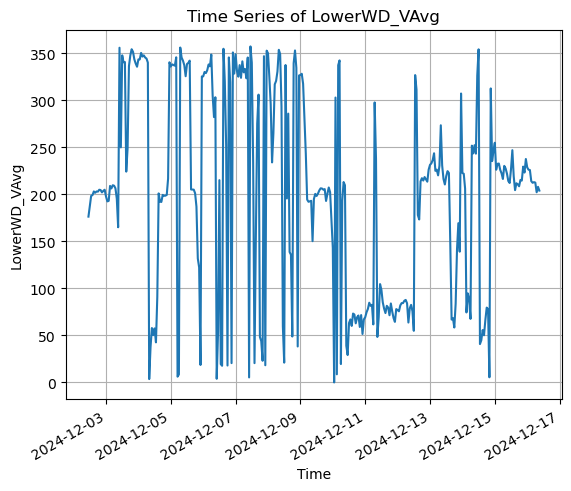

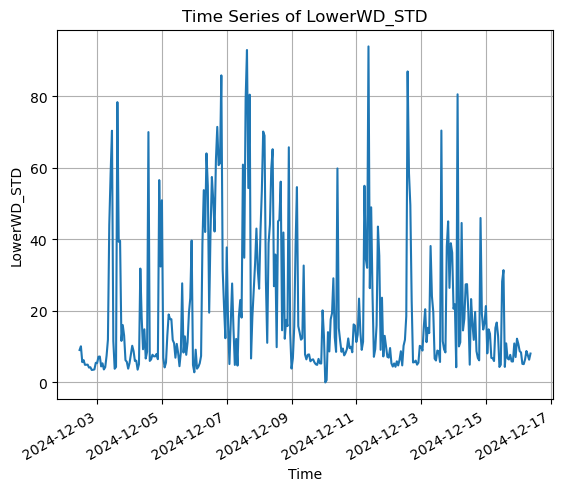

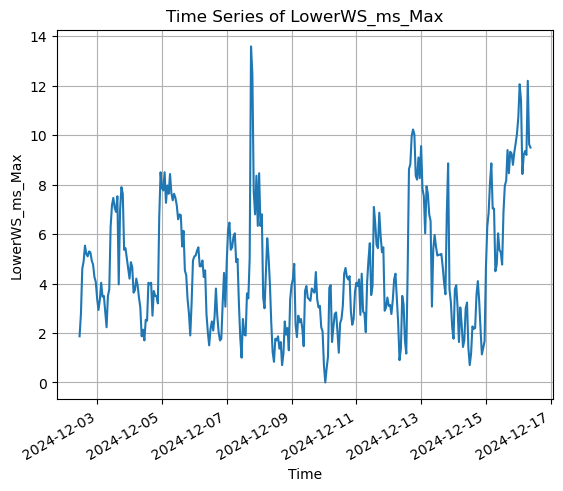

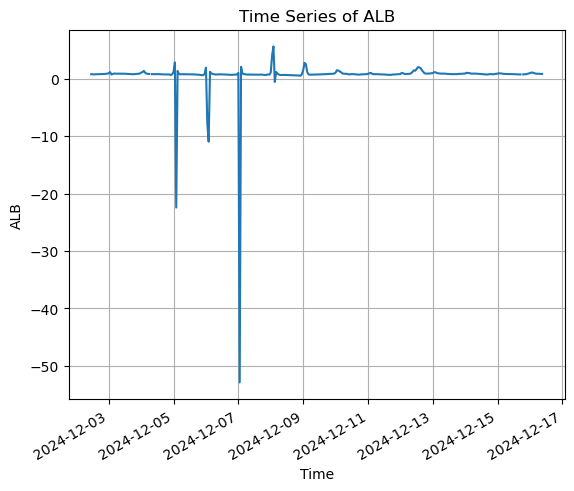

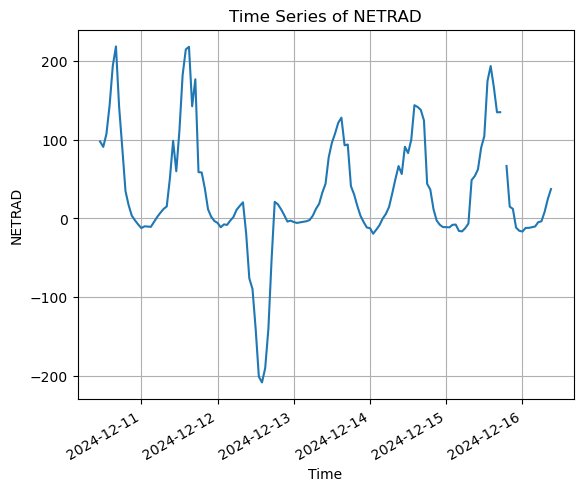

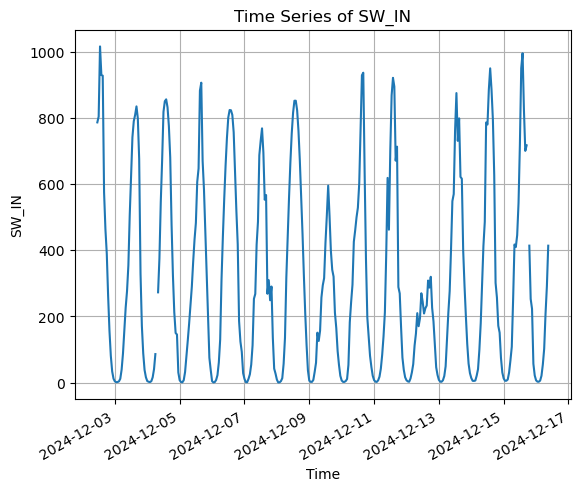

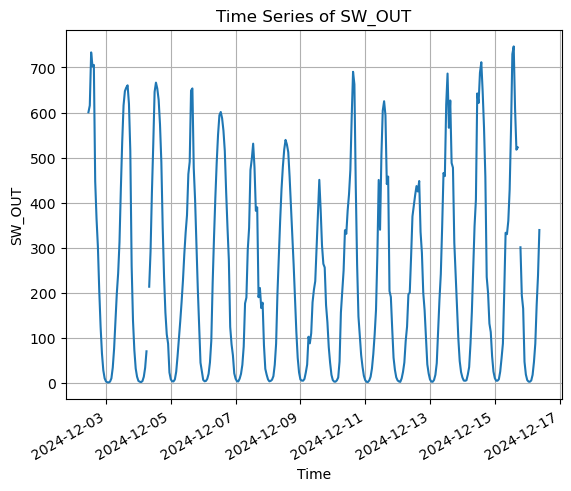

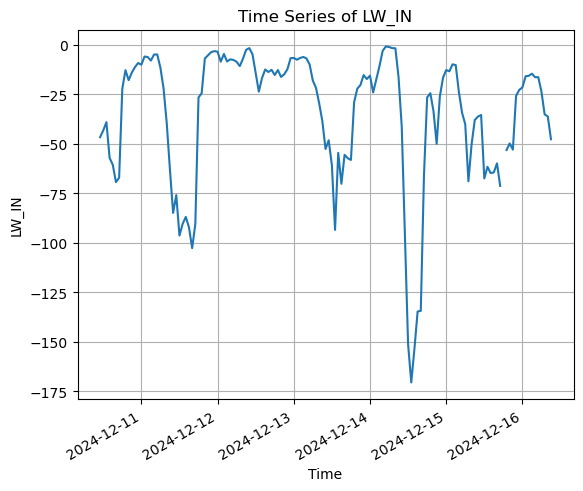

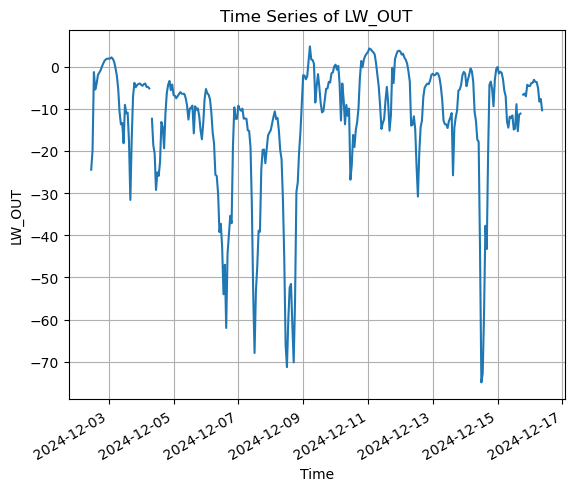

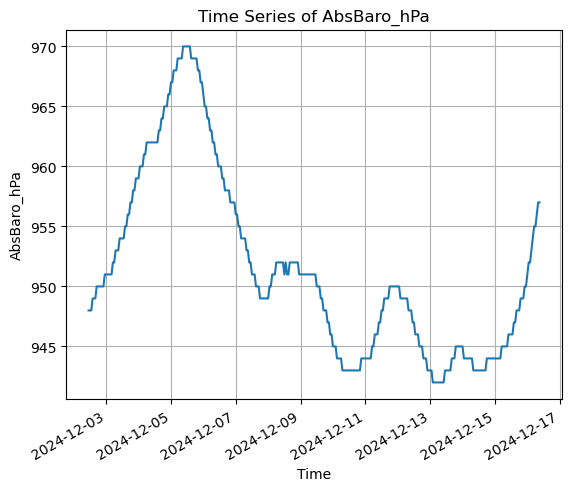

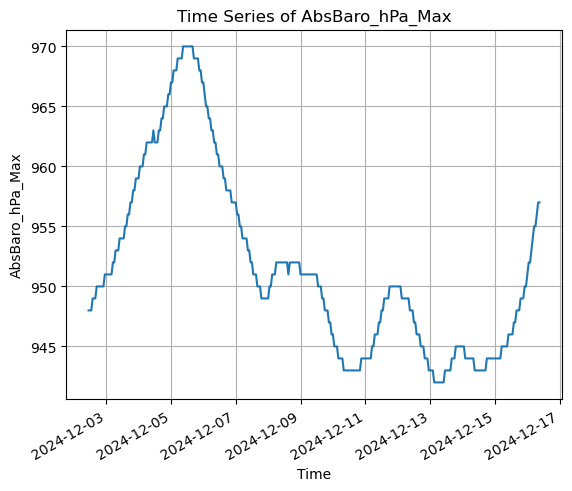

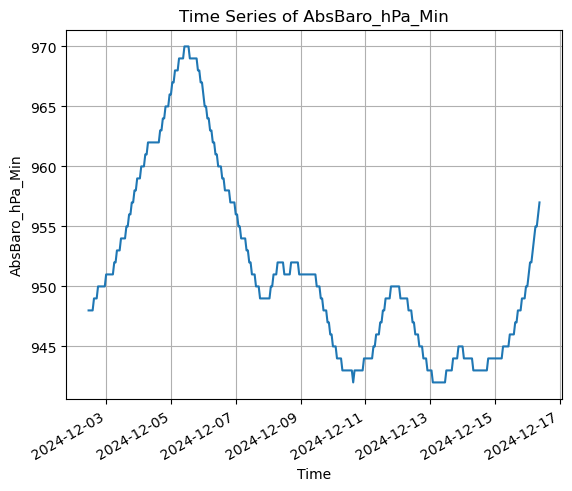

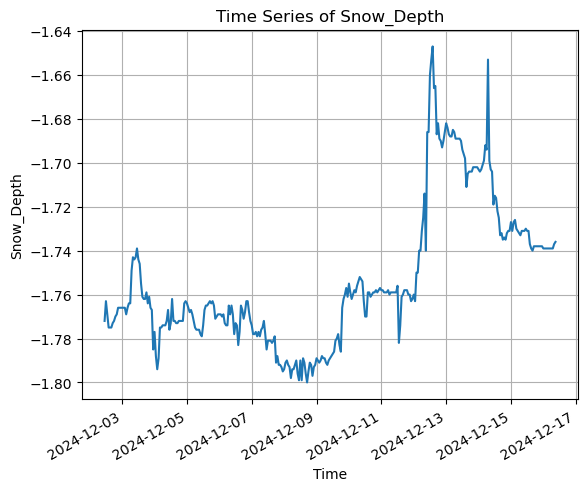

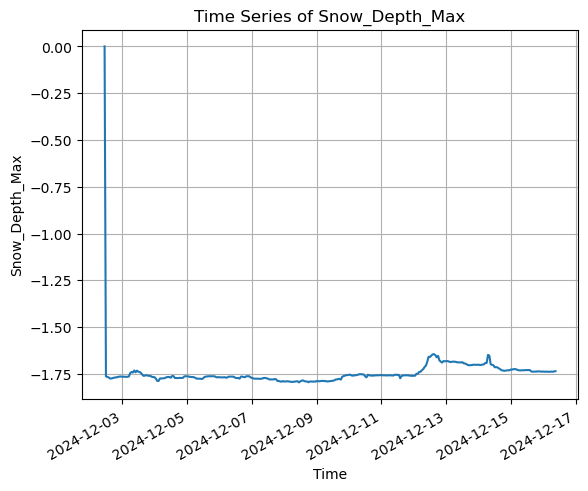

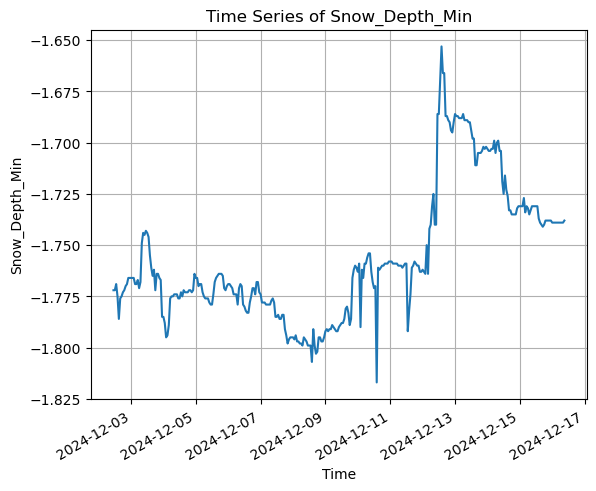

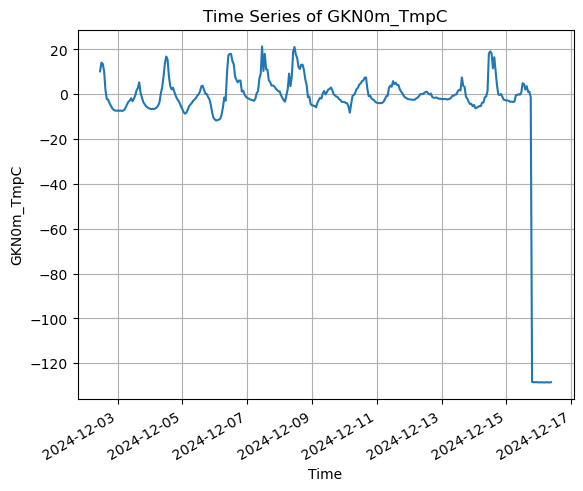

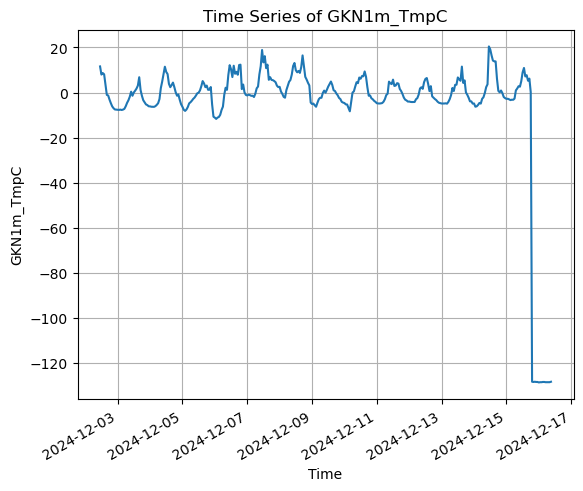

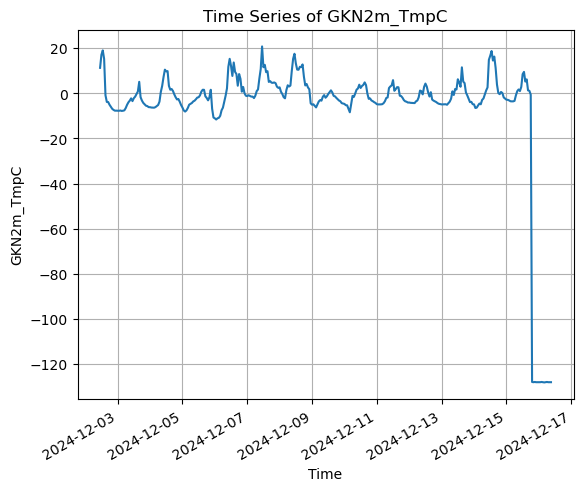

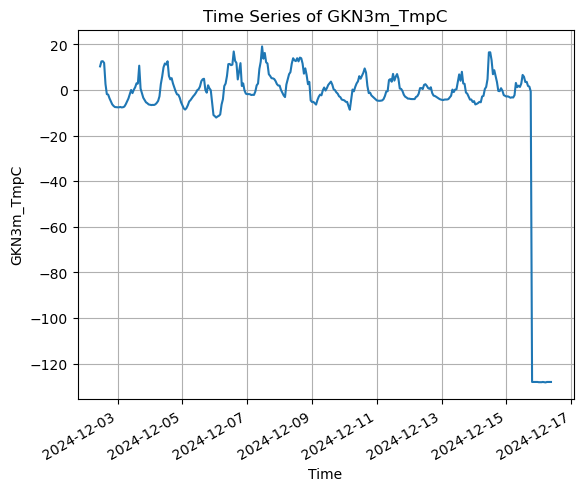

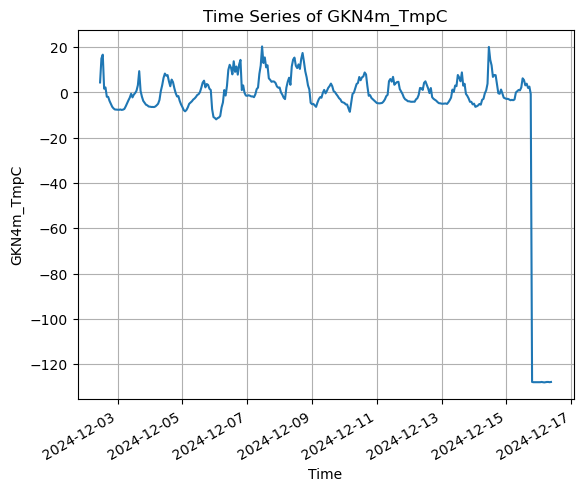

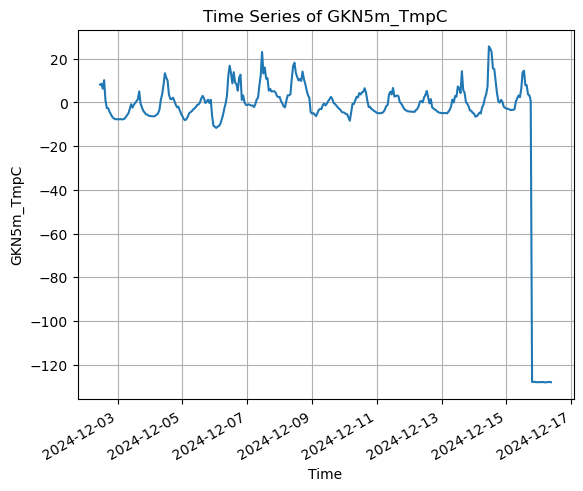

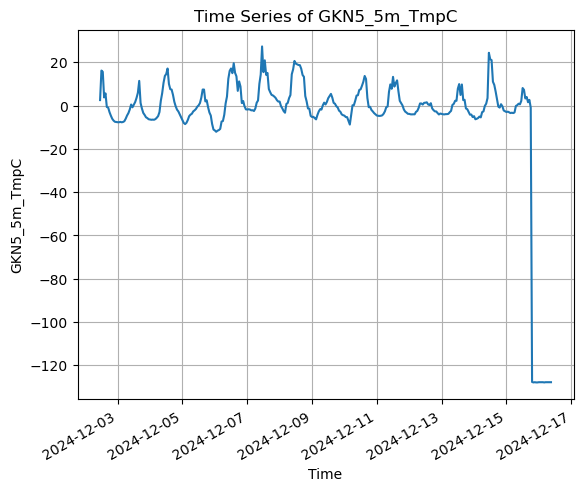

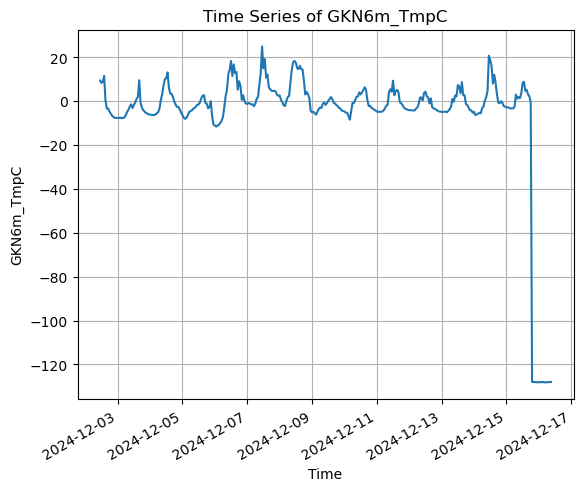

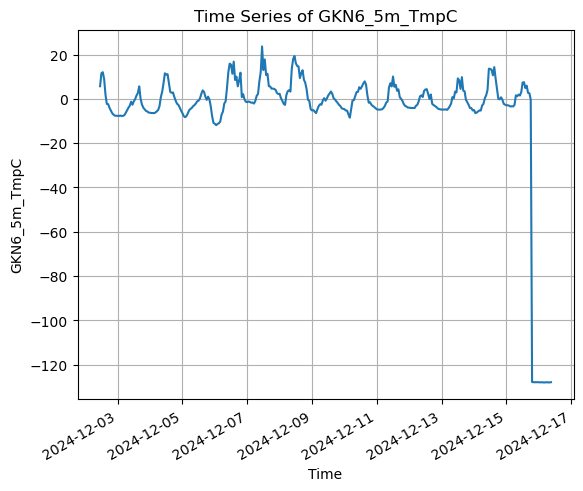

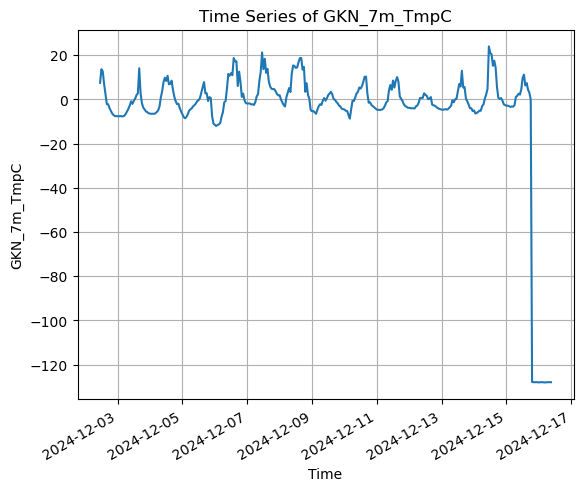

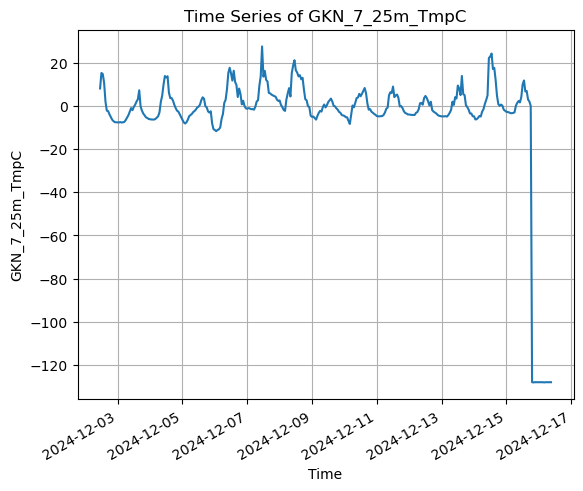

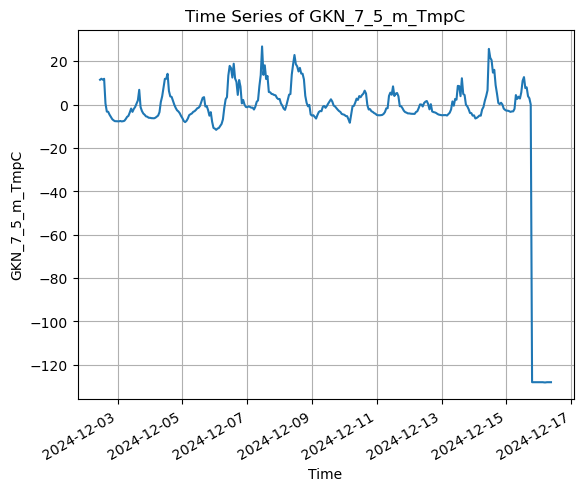

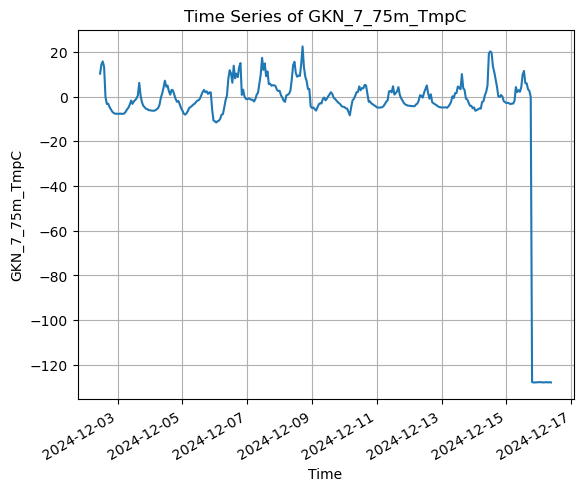

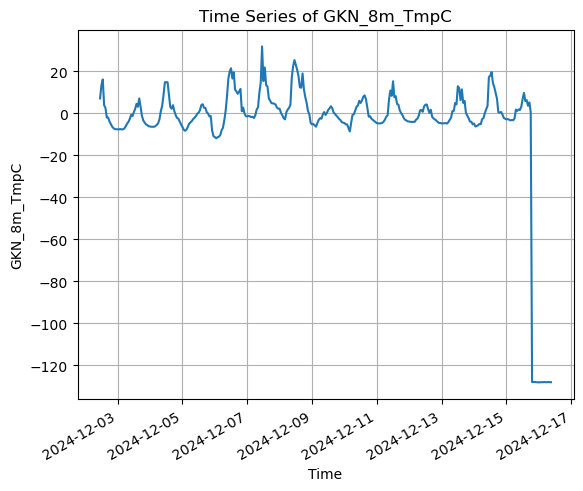

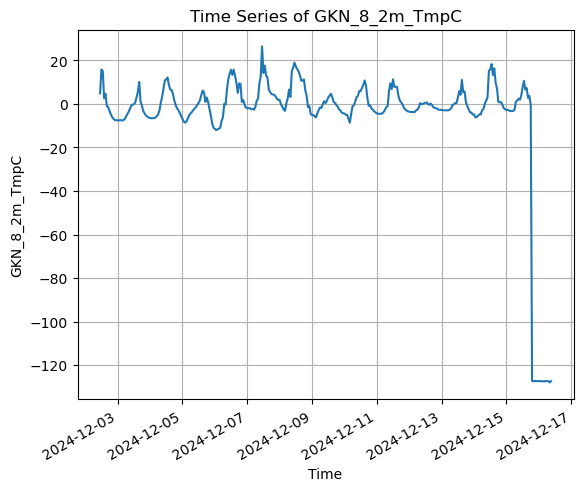

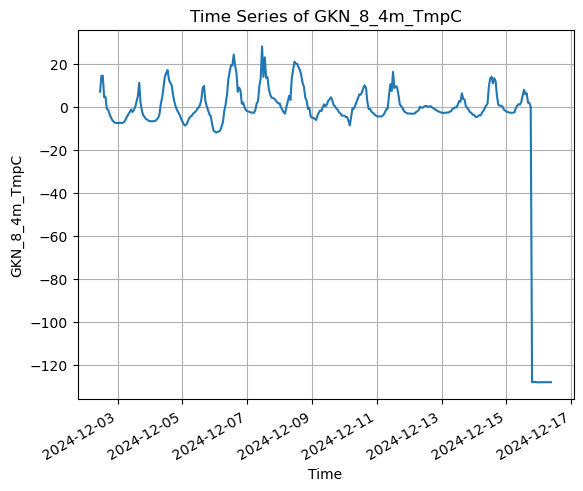

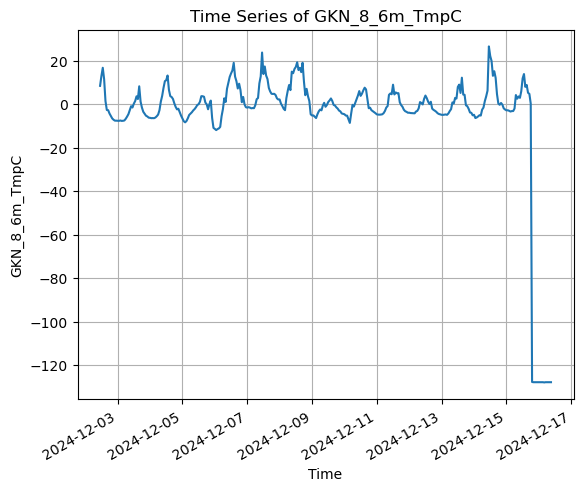

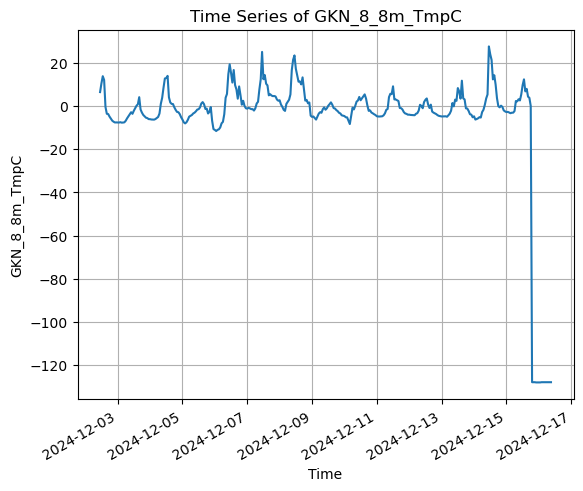

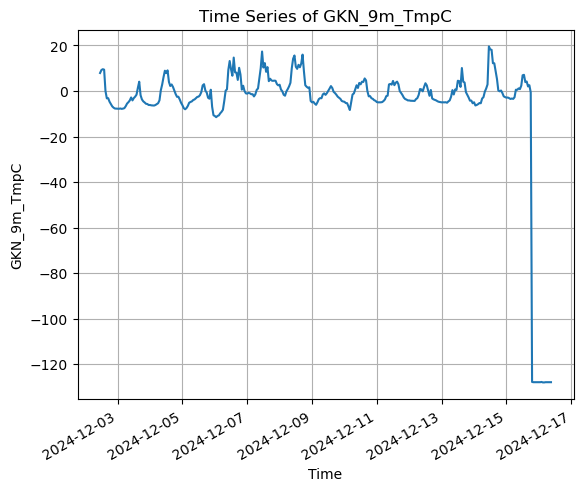

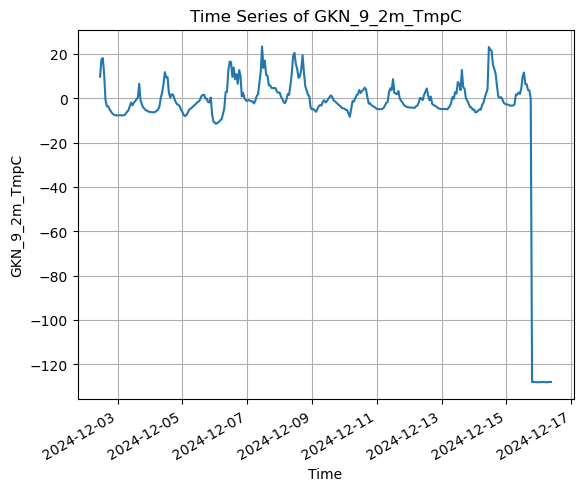

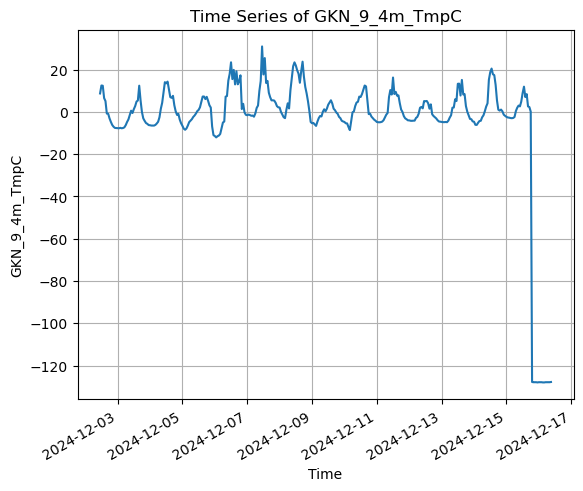

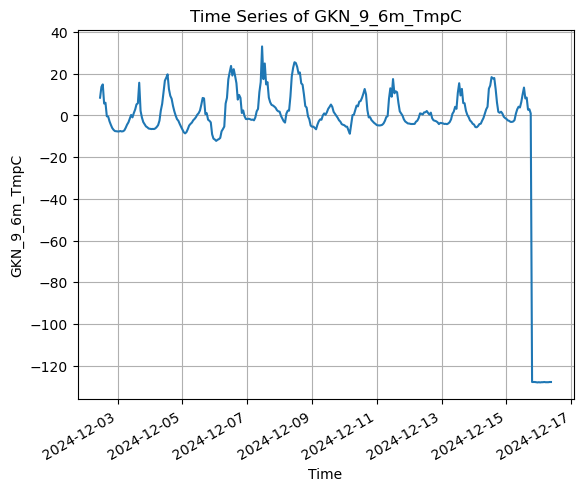

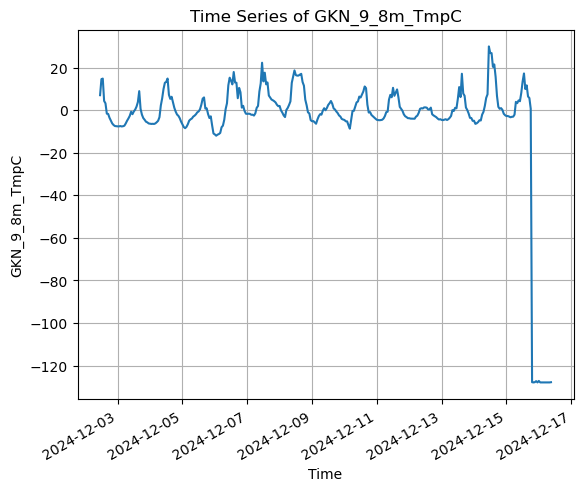

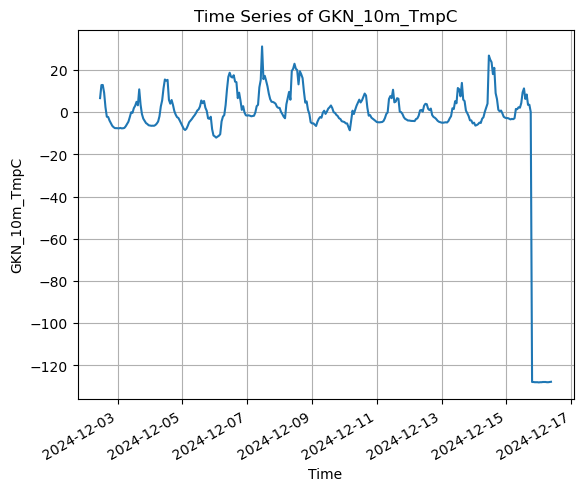

In [9]:
for var in aws.data_vars:
    plt.figure()
    aws[var].plot()
    plt.title(f'Time Series of {var}')
    plt.xlabel('Time')
    plt.ylabel(var)
    plt.grid(True)
    plt.savefig(f'aws_plots/{var}_timeseries.png')
    #plt.close()